In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import models
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

2024-08-23 16:45:18.988518: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 16:45:18.995516: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 16:45:19.070446: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-23 16:45:19.162294: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 16:45:19.223245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [4]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


In [5]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [6]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/divya/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10, batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 6s - 15ms/step - accuracy: 0.9247 - loss: 0.2462 - val_accuracy: 0.9822 - val_loss: 0.0611
Epoch 2/10
422/422 - 5s - 12ms/step - accuracy: 0.9740 - loss: 0.0815 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 3/10
422/422 - 5s - 13ms/step - accuracy: 0.9807 - loss: 0.0606 - val_accuracy: 0.9897 - val_loss: 0.0325
Epoch 4/10
422/422 - 5s - 13ms/step - accuracy: 0.9855 - loss: 0.0457 - val_accuracy: 0.9903 - val_loss: 0.0302
Epoch 5/10
422/422 - 8s - 18ms/step - accuracy: 0.9867 - loss: 0.0414 - val_accuracy: 0.9905 - val_loss: 0.0305
Epoch 6/10
422/422 - 9s - 20ms/step - accuracy: 0.9884 - loss: 0.0360 - val_accuracy: 0.9912 - val_loss: 0.0294
Epoch 7/10
422/422 - 8s - 20ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9912 - val_loss: 0.0279
Epoch 8/10
422/422 - 9s - 20ms/step - accuracy: 0.9906 - loss: 0.0294 - val_accuracy: 0.9922 - val_loss: 0.0263
Epoch 9/10
422/422 - 9s - 21ms/step - accuracy: 0.9913 - loss: 0.0276 - val_accuracy: 0.9925 - val_loss:

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0253
Test accuracy: 0.992900013923645


In [1]:
import numpy as np
image_index=21

image = np.reshape(test_images[image_index], (1, 28, 28, 1))

predictions = model.predict(image)
predicted_label = np.argmax(predictions)

actual_label = np.argmax(test_labels[image_index])

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")

import matplotlib.pyplot as plt

plt.imshow(np.squeeze(test_images[image_index]), cmap='gray')
plt.show()


NameError: name 'test_images' is not defined

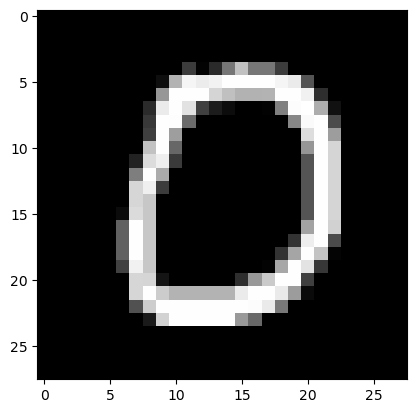

In [17]:
plt.imshow(np.squeeze(test_images[10]), cmap='gray')